In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
#import big_alpha
big_alpha_Jan = np.loadtxt(open("big_alpha_Jan.txt","rb"), delimiter=",", skiprows = 0)
big_alpha_May = np.loadtxt(open("big_alpha_May.txt","rb"), delimiter=",", skiprows = 0)

In [3]:
big_alpha = np.array([big_alpha_Jan, big_alpha_May])
vector = [[], []]

for i in range (0, 2):
    vector_big_alpha = big_alpha[i].reshape(92**2)

    for j in range (0, 92**2):
        if vector_big_alpha[j] < 45:
            vector[i].append(vector_big_alpha[j])

In [4]:
print(92**2 - len(vector[1]))

2268


In [5]:
for i in range (0, 2):
    mean = np.mean(vector[i])
    std = np.std(vector[i])
    print( f'mean = {mean}, std = {std}')

mean = 0.00377262134832438, std = 1.1610317910766532
mean = -0.09733719313882802, std = 1.3389471128493466


In [6]:
for i in range (0, 2):
    skewness = skew(vector[i])
    kurto = kurtosis(vector[i], fisher = False)
    print(f'skew = {skewness}, kurtosis = {kurto}')
    
#negative - left skewness
#heavier tail than the normal distribution, normal distribution: 3

skew = 0.18623367790984122, kurtosis = 13.225859034954544
skew = -4.078967276370955, kurtosis = 37.831786547401876


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


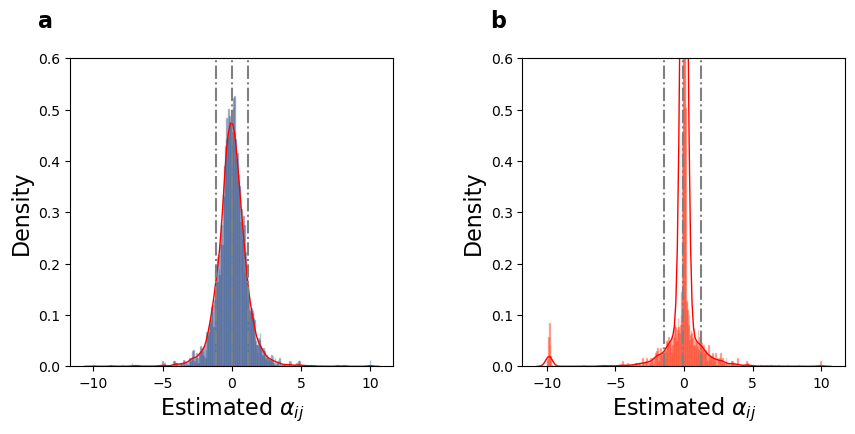

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
plt.subplots_adjust(wspace = 0.4)

label = np.array(['a', 'b'])
title = np.array(['Order 1', 'Order 2'])
color = ['#1f77b4', '#FF5733']

for i in range (0, 2):
    sns.distplot(vector[i], hist=True, ax = ax[i],
             #kde=True,
             bins = 400, color = 'red', 
             hist_kws = {'edgecolor':color[i]},
             kde_kws = {'linewidth': 1})
    
    mean = np.mean(vector[i])
    std = np.std(vector[i])
    
    ax[i].axvline(x = mean + std, color = 'grey', linestyle = 'dashdot')
    ax[i].axvline(x = mean - std, color = 'grey', linestyle = 'dashdot')
    ax[i].axvline(mean, color = 'grey', linestyle = 'dashdot')

#    ax[i].set_xlim(-5, 5)
    ax[i].set_ylim(0, 0.6)

    ax[i].set_xlabel('Estimated $\\alpha_{ij}$', fontsize = 16)
    ax[i].set_ylabel('Density', fontsize = 16)
    
#    ax[i].set_title(f'{title[i]}', fontsize = 18)
    ax[i].text(-.1, 1.1, '{}'.format(label[i]),  transform = ax[i].transAxes, size=16, weight='bold')

plt.show()

In [11]:
fig.savefig('Big-alpha_Distribution.png', dpi=300, bbox_inches='tight')

In [10]:
for i in range (0, 2):
    result = scipy.stats.anderson(vector[i], dist='norm')
    print(result)
#the null hypothesis that the data come from the chosen distribution can be rejected. 

AndersonResult(statistic=84.41660640382179, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1266.9027626816196, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [11]:
for i in range (0, 2):
    result = scipy.stats.kstest(vector[i], stats.norm.cdf)
    print(result)

KstestResult(statistic=0.04375578837964228, pvalue=9.56206185630431e-11)
KstestResult(statistic=0.3299388596912981, pvalue=0.0)
